<a href="https://colab.research.google.com/github/johannesfuest/Applied_Optimization/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cvxpy
!pip install numpy

In [2]:
import cvxpy as cp
import time
import csv
import pandas as pd
url = 'https://web.stanford.edu/~ashishg/msande214/handouts/hw1_files/austin%20data%20clean.csv'
preferred_budget_all_voters = pd.read_csv(url).to_numpy()[:,1:] ##you can get the file in numpy array format with each row denoting a budget




In [3]:
preferred_budget_all_voters.shape

(37004, 11)

In [4]:
preferred_budget_voters = preferred_budget_all_voters[0:500] # These are the actual votes we will use
n, m = preferred_budget_voters.shape
print(n,m)
net_budget = 54750

500 11


**Using code from chatgpt**

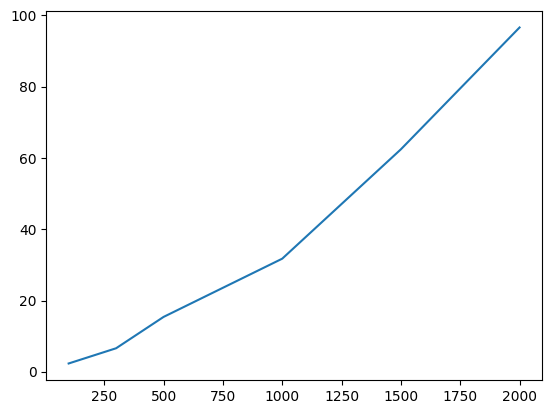

Time does not appear to be scaling linearly


In [11]:
!pip install matplotlib
import matplotlib.pyplot as plt

N = [100, 300, 500, 1000, 1500, 2000]
times_1 = []
for n in N:
  preferred_budget_voters = preferred_budget_all_voters[0:n]
  # Assume the votes are given as a 2D list (or a NumPy array)
  # Each row corresponds to a voter, and each column corresponds to a project
  z_ij = preferred_budget_voters # the code from chatgpt assumes that the z_ij are given to us

  # Number of voters and projects
  num_voters, num_projects = z_ij.shape

  # Total available budget (B)
  B = 54750  # total available budget, replacing placeholder from chatgpt with actual value

  # Start timing the setup phase
  setup_start_time = time.time()

  # Define the decision variables
  x_j = cp.Variable(num_projects, nonneg=True)  # The final allocated funds for each project
  w_ij = cp.Variable((num_voters, num_projects), nonneg=True)  # The overlap between allocated and voter submitted budgets

  # Objective: Maximize the total overlap in funds
  objective = cp.Maximize(cp.sum(w_ij))

  # Constraints
  constraints = []

  # Budget constraint: total allocated funds cannot exceed the available budget
  constraints.append(cp.sum(x_j) <= B)

  # Overlap constraints: w_ij must be less than or equal to both the aggregated budget and the submitted budgets
  for i in range(num_voters):
      for j in range(num_projects):
          constraints.append(w_ij[i, j] <= x_j[j])  # w_ij must be <= allocated funds x_j
          constraints.append(w_ij[i, j] <= z_ij[i, j])  # w_ij must be <= submitted budget z_ij

  # Define the problem
  problem = cp.Problem(objective, constraints)

  # End timing the setup phase
  setup_end_time = time.time()

  # Start timing the solve phase
  solve_start_time = time.time()

  # Solve the problem
  problem.solve()

  # End timing the solve phase
  solve_end_time = time.time()
  times_1.append(solve_end_time - solve_start_time)

plt.plot(N, times_1)
plt.show()

print("Time does not appear to be scaling linearly")

**Solve using hand-optimized cvxpy**

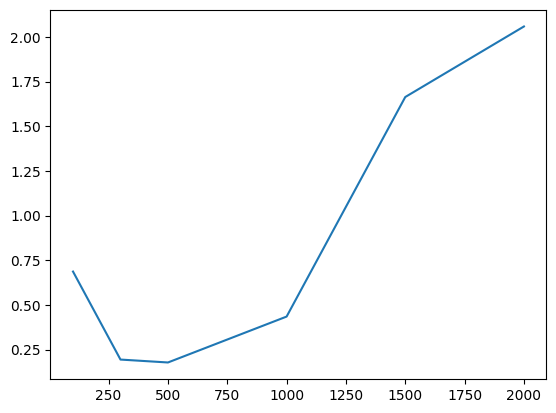

Time does not appear to be scaling linearly


In [12]:
times_2 = []
for n in N:
  preferred_budget_voters = preferred_budget_all_voters[0:n]
  # Assume the votes are given as a 2D list (or a NumPy array)
  # Each row corresponds to a voter, and each column corresponds to a project
  z_ij = preferred_budget_voters # the code from chatgpt assumes that the z_ij are given to us

  # Number of voters and projects
  num_voters, num_projects = z_ij.shape

  # Total available budget (B)
  B = 54750  # total available budget, replacing placeholder from chatgpt with actual value

  # Start timing the setup phase
  setup_start_time = time.time()

  # Define the decision variables
  # CHANGE: WE DEFINED x_j to a 1 x num_projects vector explicitly, to make it easier to then write matrix constraints
  x_j = cp.Variable((1,num_projects), nonneg=True)  # The final allocated funds for each project

  w_ij = cp.Variable((num_voters, num_projects), nonneg=True)  # The overlap between allocated and voter submitted budgets

  # Objective: Maximize the total overlap in funds
  objective = cp.Maximize(cp.sum(w_ij))

  # Constraints
  constraints = []

  # Budget constraint: total allocated funds cannot exceed the available budget
  constraints.append(cp.sum(x_j) <= B)

  # Overlap constraints: w_ij must be less than or equal to both the aggregated budget and the submitted budgets
  # CHANGE: WE USED MATRIX CONSTRAINTS, which allows cvxpy to do additional optimizations (courtesy Philipp Schiele)
  constraints.append(w_ij <= x_j)  # w_ij must be <= allocated funds x_j
  constraints.append(w_ij <= z_ij)  # w_ij must be <= submitted budget z_ij

  # Define the problem
  problem = cp.Problem(objective, constraints)

  # End timing the setup phase
  setup_end_time = time.time()

  # Start timing the solve phase
  solve_start_time = time.time()

  # Solve the problem
  problem.solve()

  # End timing the solve phase
  solve_end_time = time.time()
  times_2.append(solve_end_time - solve_start_time)
plt.plot(N, times_2)
plt.show()

print("Time does not appear to be scaling linearly")

In [14]:
import numpy as np
# Assume the votes are given as a 2D list (or a NumPy array)
# Each row corresponds to a voter, and each column corresponds to a project
preferred_budget_voters = preferred_budget_all_voters[0:500]
z_ij = preferred_budget_voters # the code from chatgpt assumes that the z_ij are given to us

# Number of voters and projects
num_voters, num_projects = z_ij.shape

# Total available budget (B)
B = 54750  # total available budget, replacing placeholder from chatgpt with actual value

# Start timing the setup phase
setup_start_time = time.time()

# Define the decision variables
# CHANGE: WE DEFINED x_j to a 1 x num_projects vector explicitly, to make it easier to then write matrix constraints
x_j = cp.Variable((1,num_projects), nonneg=True)  # The final allocated funds for each project


w_ij = cp.Variable((num_voters, num_projects), nonneg=True)  # The overlap between allocated and voter submitted budgets

# Objective: Maximize the total overlap in funds
objective = cp.Maximize(cp.sum(w_ij))

# Constraints
constraints = []

# Budget constraint: total allocated funds cannot exceed the available budget
constraints.append(cp.sum(x_j) <= B)

# Overlap constraints: w_ij must be less than or equal to both the aggregated budget and the submitted budgets
# CHANGE: WE USED MATRIX CONSTRAINTS, which allows cvxpy to do additional optimizations (courtesy Philipp Schiele)
constraints.append(w_ij <= x_j)  # w_ij must be <= allocated funds x_j
constraints.append(w_ij <= z_ij)  # w_ij must be <= submitted budget z_ij

constraints.append(x_j[0, 0] >= 1050) # new constraint

# Define the problem
problem = cp.Problem(objective, constraints)

# End timing the setup phase
setup_end_time = time.time()

# Start timing the solve phase
solve_start_time = time.time()

# Solve the problem
problem.solve()

# Calculate the optimal aggregate budget
sum_x = np.sum(x_j.value)

print("Optimal allocated funds for each project:", x_j.value)
print("Optimal total overlap in funds:", problem.value)
print("Aggregate budget:", sum_x)

Optimal allocated funds for each project: [[ 1049.99999812  1749.99999535  4750.00000091  9999.9999994
   4250.00000437   749.99999881  2749.99999783  2450.00002369
   4999.99999961 21499.99999385   499.99999008]]
Optimal total overlap in funds: 25544650.001460984
Aggregate budget: 54750.00000203089
